In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Function to normalize an image
def normalize_image(image):
    # Normalize each channel independently
    normalized_image = np.zeros_like(image, dtype=np.float32)
    for channel in range(3):  
        channel_data = image[:, :, channel]
        mean_intensity = np.mean(channel_data)
        std_deviation = np.std(channel_data)

        # Avoid division by zero
        if std_deviation == 0:
            normalized_image[:, :, channel] = channel_data - mean_intensity
        else:
            normalized_image[:, :, channel] = (channel_data - mean_intensity) / std_deviation
    return normalized_image

In [3]:
X=[]
Y=[]
RAW_X=[]    
resize_dim = (64, 64)
# Paths to dataset folders
input_folder = r"E:\MCTA\Semester 1\ME\CI\project\MS2-2\casia dataset"  
# Iterate over class folders in the dataset
for class_idx, class_folder in enumerate(os.listdir(input_folder)):
    class_path = os.path.join(input_folder, class_folder)
    if os.path.isdir(class_path):
        # Process each image in the class folder
        for filename in os.listdir(class_path):
            # Load the image in RGB
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
            resized_image = cv2.resize(image, resize_dim)
            
            normalized_image = normalize_image(resized_image)
            RAW_X.append(resized_image)
            X.append(normalized_image)
            Y.append(class_idx)              
                

In [4]:
# Convert X to a numpy array for easier computation
X = np.array(X)
Y= np.array(Y)
# Compute channel-wise global minimum and maximum
global_min = np.min(X, axis=(0, 1, 2))  # Shape: (3,) -> Min for R, G, B
global_max = np.max(X, axis=(0, 1, 2))  # Shape: (3,) -> Max for R, G, B

# Normalize each channel independently
X_scaled = np.zeros_like(X, dtype=np.float32)
for channel in range(3):
    X_scaled[..., channel] = (X[..., channel] - global_min[channel]) / (global_max[channel] - global_min[channel])

print(f"Global Min (per channel): {global_min}")
print(f"Global Max (per channel): {global_max}")
print("All images are now scaled to the range [0, 1] per channel.")

Global Min (per channel): [-7.381614 -6.133485 -6.133485]
Global Max (per channel): [ 7.379166  9.757764 13.784458]
All images are now scaled to the range [0, 1] per channel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


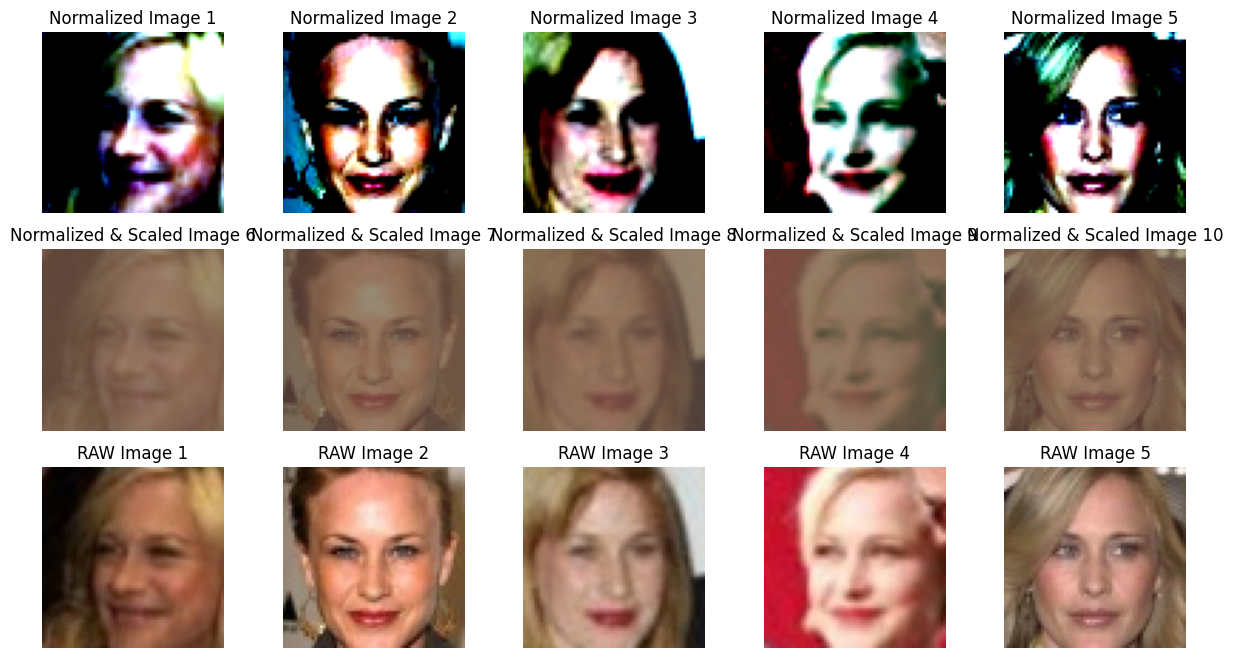

In [5]:
# Plot 5 random images from the X array
plt.figure(figsize=(15, 8))  
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X[i]) 
    plt.axis('off')  
    plt.title(f"Normalized Image {i+1}")
    
    plt.subplot(3, 5, i+6)  
    plt.imshow(X_scaled[i]) 
    plt.axis('off')  
    plt.title(f"Normalized & Scaled Image {i+6}")
    
    plt.subplot(3, 5, i+11)  
    plt.imshow(RAW_X[i]) 
    plt.axis('off')  
    plt.title(f"RAW Image {i+1}")
plt.show()

In [6]:
# Split the data into 85% training, and 15% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.15, random_state=42)

In [7]:
#saving the train ,test and validation normalized dataset to be used later 
np.savez_compressed('X_train.npz', X=X_train)
np.savez_compressed('Y_train.npz', X=Y_train)

np.savez_compressed('X_test.npz', X=X_test)
np.savez_compressed('Y_test.npz', X=Y_test) 